# California house price prediction

The problem that we are going to solve here is that given a set of features that describe a house in California, our machine learning model must predict the house price. To train our machine learning model with California housing data, we will be using scikit-learn’s fetch_california_housing dataset.

In this dataset, each row describes a california town or suburb. There are 20640 rows and 8 attributes (features) with a target column (price).
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Importing the California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [6]:
# Initializing the dataframe
data = pd.DataFrame(california.data)

In [7]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
#Adding the feature names to the dataframe
data.columns = california.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


MedInc median income in block group <br>
HouseAge median house age in block group <br>
AveRooms average number of rooms per household <br>
AveBedrms average number of bedrooms per household <br>
Population block group population <br>
AveOccup average number of household members <br>
Latitude block group latitude <br>
Longitude block group longitude <br>

Each record in the database describes a Caliornia suburb or town.

In [11]:
#Adding target variable to dataframe
data['PRICE'] = california.target 
# Median value of owner-occupied homes in $1000s

In [12]:
#Check the shape of dataframe
data.shape

(20640, 9)

In [13]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [14]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [15]:
# Identifying the unique number of values in the dataset
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [16]:
# Check for missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [17]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE


In [18]:
# Viewing the data statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(9, 9)

<AxesSubplot:>

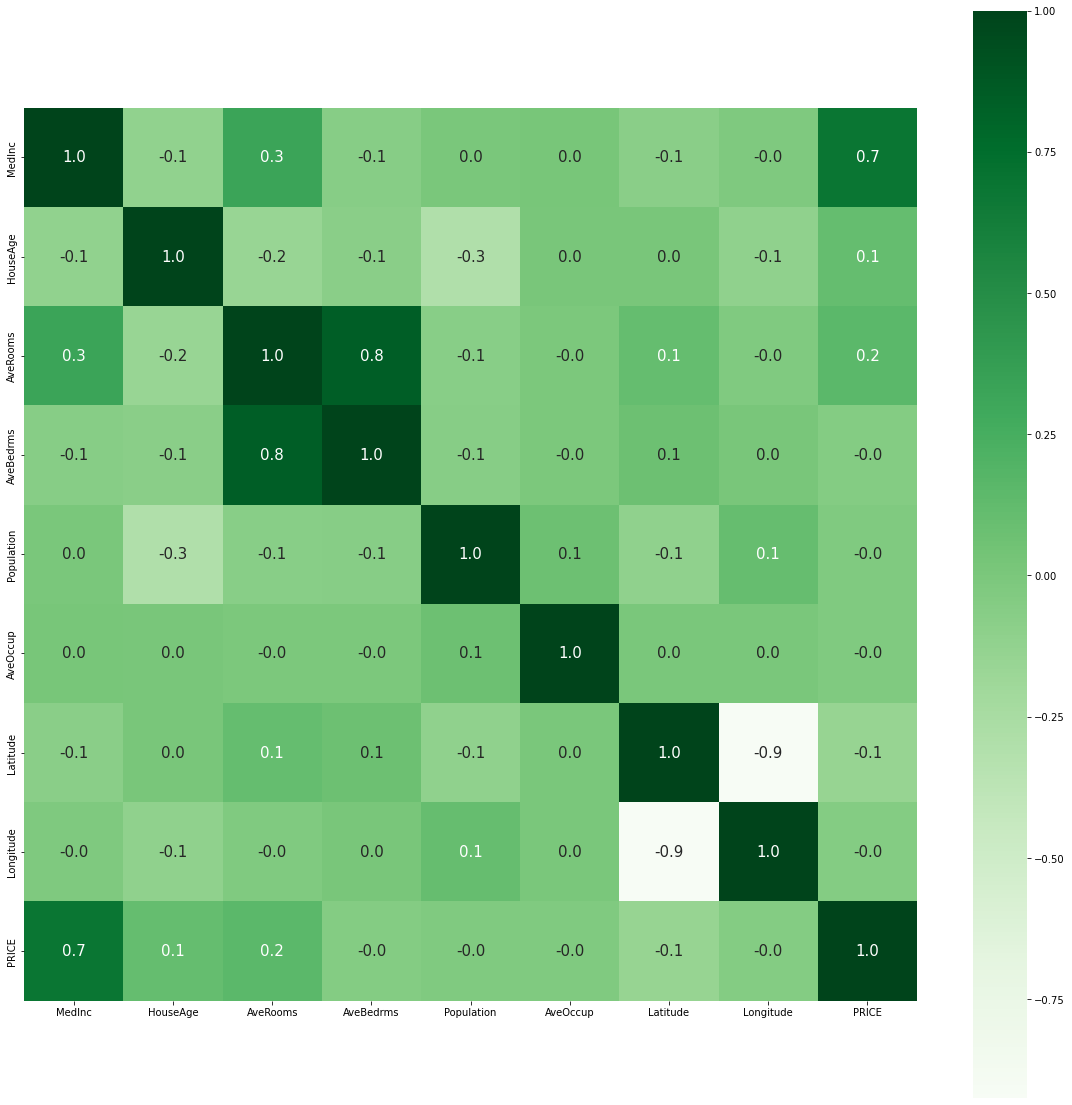

In [20]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [21]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [22]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Linear regression

#### Training the model

In [23]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
# Value of y intercept
lm.intercept_

-36.9258842988459

In [26]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,MedInc,0.438284
1,HouseAge,0.009021
2,AveRooms,-0.113436
3,AveBedrms,0.648835
4,Population,-0.000008
5,AveOccup,-0.003978
6,Latitude,-0.421168
7,Longitude,-0.43468


#### Model Evaluation

In [27]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [28]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6081901093734017
Adjusted R^2: 0.6079730251483852
MAE: 0.5319076620403791
MSE: 0.5258454910434389
RMSE: 0.7251520468449627


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 






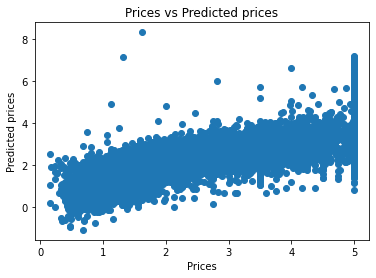

In [29]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

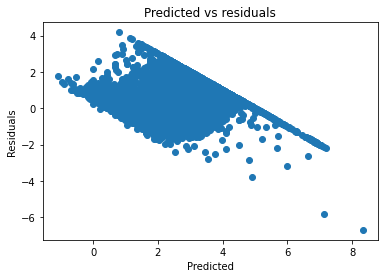

In [30]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

C:\Users\sahaj\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


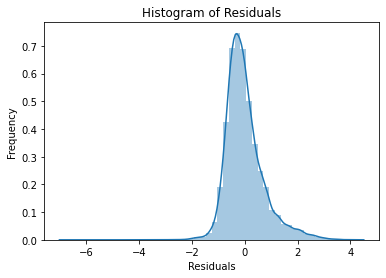

In [35]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [36]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [37]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6010291338754374
Adjusted R^2: 0.6005129173253814
MAE: 0.5303872778945684
MSE: 0.5213468821374595
RMSE: 0.7220435458734186


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Random Forest Regressor 

#### Train the model

In [38]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [39]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9728388342881946
Adjusted R^2: 0.9728237855087989
MAE: 0.12383472307585862
MSE: 0.03645282281719654
RMSE: 0.19092622349273172


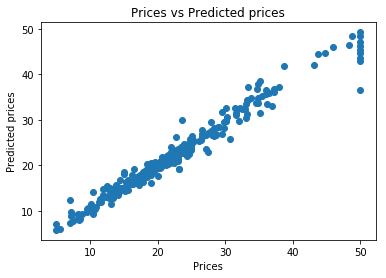

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

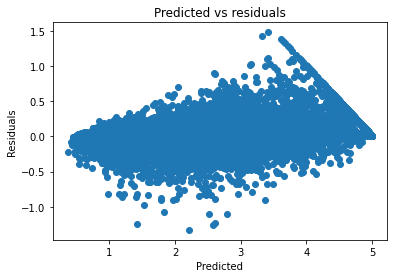

In [41]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [42]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [43]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7999676717747921
Adjusted R^2: 0.7997088558883613
MAE: 0.3357915474483205
MSE: 0.2613880849494155
RMSE: 0.5112612687749929


# XGBoost Regressor

#### Training the model

In [45]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


### Model Evaluation

In [46]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [47]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9467753349431811
Adjusted R^2: 0.9467458455519175
MAE: 0.18818589321214796
MSE: 0.0714324747843043
RMSE: 0.26726854432256764


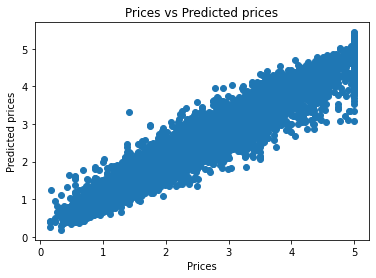

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

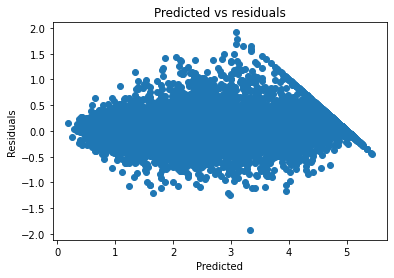

In [49]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [50]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [51]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8331080832284813
Adjusted R^2: 0.8328921467358124
MAE: 0.30944652988864313
MSE: 0.21808254148464745
RMSE: 0.46699308505014014


# SVM Regressor

In [52]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [53]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [54]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [55]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [56]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7478602270878776
Adjusted R^2: 0.7477205277885288
MAE: 0.3847450385143313
MSE: 0.33839513976157776
RMSE: 0.5817174054139843


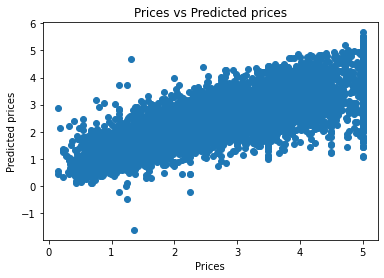

In [57]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

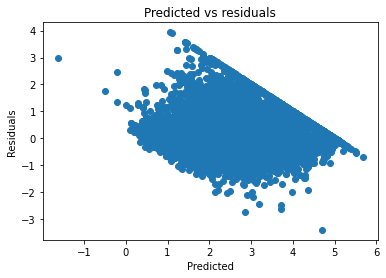

In [58]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [59]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [60]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7263792917547527
Adjusted R^2: 0.7260252620497613
MAE: 0.398389131637503
MSE: 0.357548170164801
RMSE: 0.5979533177136832


# Evaluation and comparision of all the models

In [61]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,83.310808
1,Random Forest,79.996767
3,Support Vector Machines,72.637929
0,Linear Regression,60.102913


## Hence XGBoost Regression works the best for this dataset.